# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
print(da['DMDMARTL'].unique())

# Rename the marital status variable
da['DMDMARTL'] = da['DMDMARTL'].replace({1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated',
                                         5:"Never Married", 6:"Living with partner", 77:'Refused',
                                        np.nan:'Missing'})

# print unique values of DMDMARTL
# print(da['DMDMARTL'].unique())

# Get the frequency count of unique values of DMDMARTL
print(da['DMDMARTL'].value_counts())
print()

# Replace Male with 1 and Female with 2
da['RIAGENDR'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})

da_f = da[da['RIAGENDR'] == 'Female']
print(da_f['DMDMARTL'].value_counts())

print()

da_m = da[da['RIAGENDR'] == 'Male']
print(da_m['DMDMARTL'].value_counts())

print()
print(da.groupby(['RIAGENDR'])['DMDMARTL'].value_counts())


da_adults = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
print()

print(da_adults['DMDMARTL'].value_counts())
print()

print(da_adults.groupby(['RIAGENDR'])['DMDMARTL'].value_counts())

[ 1.  3.  6.  4.  5. nan  2. 77.]
Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTL, dtype: int64

Married                1303
Never Married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTL, dtype: int64

Married                1477
Never Married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTL, dtype: int64

RIAGENDR  DMDMARTL           
Female    Married                1303
          Never Married           520
          Divorced                350
          Widowed                 296
          Living with 

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

Approximately there are 10% more married men than women. Almost equal number of men and women are living with partners and similar number of records are missing for both with 1 refusing to disclose in each gender category. Interestingly, the number of never married, widowed, divorced and separated females are higher than that of males.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

There are more number of women who are either living with partner or separated in 30-40 age group.

__Q1c.__ Repeat part b for the men.

The distribution of marital statuses remains almost similar for men of 30-40 age group when compared to the overall population but there are lower separated men in this age group.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [3]:
da_f = da[da['RIAGENDR'] == 'Female']

da_f = da_f.replace({np.nan:'Missing'})

# remove missing values
da_f = da_f.dropna()
# 1st value is not inclusive so using 17 so that 18 falls into that group
da_f['age_group'] = pd.cut(da_f.RIDAGEYR, [17,30,40,50,60,70,80])

da_f = da_f.groupby('age_group')['DMDMARTL'].value_counts()

da_f = da_f.unstack()
#print(da_f)
da_f = da_f.apply(lambda x: x/x.sum())

print(da_f.to_string(float_format='%.3f'))
#print(da_f[pd.isnull(da_f['age_group'])]['RIDAGEYR'].unique())

DMDMARTL   Divorced  Living with partner  Married  Missing  Never Married  Refused  Separated  Widowed
age_group                                                                                             
(17, 30]      0.031                0.435    0.121    1.000          0.498      NaN      0.093      NaN
(30, 40]      0.123                0.218    0.198      NaN          0.187      NaN      0.144    0.007
(40, 50]      0.197                0.141    0.221      NaN          0.121      NaN      0.280    0.041
(50, 60]      0.237                0.122    0.197      NaN          0.081    1.000      0.229    0.095
(60, 70]      0.243                0.073    0.163      NaN          0.073      NaN      0.186    0.220
(70, 80]      0.169                0.011    0.100      NaN          0.040      NaN      0.068    0.639


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

There are some interesting or probably expected trends as we move up across different age groups. Divorced and widowed females are lowest in the 18-30 age group and those proportions increase gradually. But noticeably, the proportion of divorced reaches the maximum in 60-70 age group and falls below 40-50 age group when we reach 70-80 age group.
Living with partner and never married females are maximum in 17-30 age group and it decreases as age increases with marital status changes. 



__Q2b.__ Repeat the construction for males.

In [4]:
da_m = da[da['RIAGENDR'] == 'Male']
#da_m = da_m.replace({np.nan:'Missing'})

# remove missing values
da_m = da_m.dropna()
# 1st value is not inclusive so using 17 so that 18 falls into that group
da_m['age_group'] = pd.cut(da_m.RIDAGEYR, [17,30,40,50,60,70,80])

da_m = da_m.groupby('age_group')['DMDMARTL'].value_counts()

da_m = da_m.unstack()
da_m = da_m.apply(lambda x: x/x.sum())

print(da_m.to_string(float_format='%.3f'))
#print(da_f[pd.isnull(da_f['age_group'])]['RIDAGEYR'].unique())

DMDMARTL   Divorced  Living with partner  Married  Never Married  Widowed
age_group                                                                
(17, 30]        NaN                0.500    0.064          0.500      NaN
(30, 40]      0.200                0.250    0.213          0.071      NaN
(40, 50]      0.200                0.250    0.234          0.071      NaN
(50, 60]      0.200                  NaN    0.170          0.071      NaN
(60, 70]      0.400                  NaN    0.170          0.214    0.500
(70, 80]        NaN                  NaN    0.149          0.071    0.500


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

Living with partner, married, never married males are in majority in 17-30 age group but gradually decrease

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

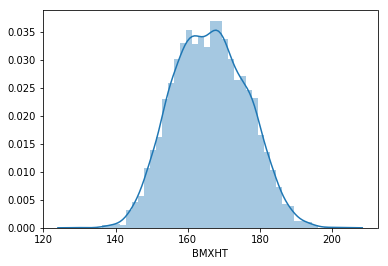

In [5]:
sns.distplot(da.BMXHT.dropna())

plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

As the number of bins increases extremely, the distriution starts to become more discrete and
as the bins decrease, the distriutions tend to be normal with a peak in the middle.
In both cases, the distributions move away from normal.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

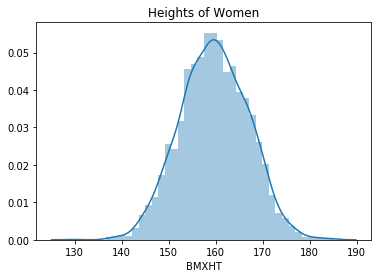

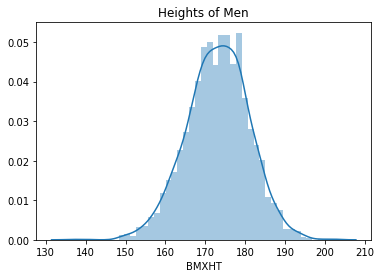

Text(0.5,1,'Heights of Women and Men')

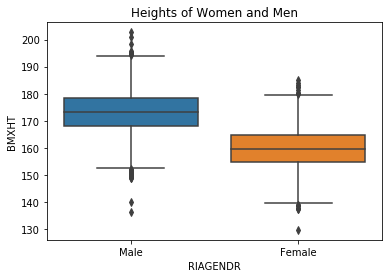

In [6]:
sns.distplot(da[da.RIAGENDR == 'Female'].BMXHT.dropna()).set_title('Heights of Women')
plt.show()

sns.distplot(da[da.RIAGENDR == 'Male'].BMXHT.dropna()).set_title('Heights of Men')
plt.show()

sns.boxplot(x='RIAGENDR', y='BMXHT', data=da).set_title('Heights of Women and Men')


__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

From the boxplots, we can see the median and the distribution of heights for male and females.
On an average, males have higher heights than females. For males, the average height is around 175 where as the median height for females is around 160. From the histograms, the spread and shape of the data is understandable but not so much from the box plots. Boxplots also help us to see where most of the outliers are. There are considerable number of outliers on both higher and lower ends.

__Q3d.__ Make a histogram of the log-transformed heights.

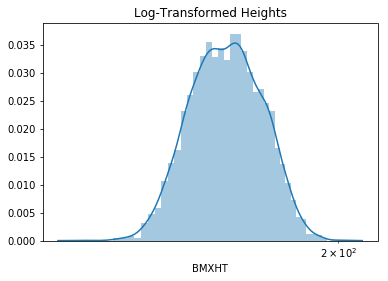

In [7]:
sns.distplot(da['BMXHT'].dropna()).set_title('Log-Transformed Heights')
plt.xscale('log')

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

Usually log transformation helps to understand the relationships more clearly and make the distributions more clearly interpretable. But there doesn't seem to be much difference in the ditribution of the heights and the distribution of the log-transformed heights. Both convey almost similar information.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

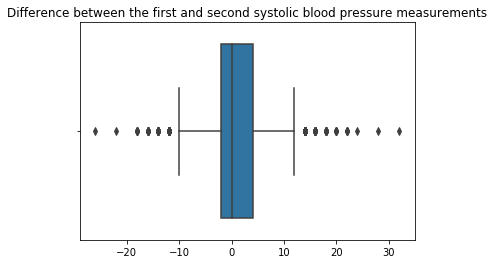

In [8]:
sns.boxplot(da.BPXSY1-da.BPXSY2).set_title('Difference between the first and second systolic blood pressure measurements')
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [9]:
da[(da.BPXSY1-da.BPXSY2) < 0].shape[0]/da.shape[0]

0.3412380122057541

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

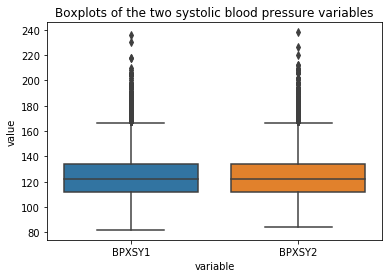

In [10]:
# sns.boxplot(da.BPXSY1)
# sns.boxplot(da.BPXSY2).set_title('Boxplots of the two systolic blood pressure variables')

sns.boxplot(x="variable", y="value", data=pd.melt(da[['BPXSY1', 'BPXSY2']])).set_title('Boxplots of the two systolic blood pressure variables')

plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

In both the measurments, there are a significant number of outliers above 160 and the values seem to be evenly distributed between 110 and 130 with an average measurement of around 120.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [11]:
da['DMDEDUC2'] = da['DMDEDUC2'].replace({1:'<9', 2:'9-11', 3:'HS/GED', 4:'Some college/AA',
                                        5:'College', 9:'Dont Know'})


da.groupby('DMDEDUC2')['DMDHHSIZ'].value_counts(normalize=True)
# da_h_n = da['DMDEDUC2'].value_counts(normalize=True)  # value_counts() excludes NA values
# print(da_h_n)

# Same answer as above but may be use normalize; looks more sophisticated
# da_h_d = da['DMDEDUC2'].value_counts()
# print(da_h_d/da_h_d.sum())

DMDEDUC2         DMDHHSIZ
9-11             2           0.222395
                 3           0.163297
                 4           0.152411
                 5           0.146190
                 1           0.116641
                 6           0.113530
                 7           0.085537
<9               2           0.224427
                 5           0.148092
                 3           0.146565
                 4           0.132824
                 7           0.129771
                 1           0.109924
                 6           0.108397
College          2           0.347731
                 3           0.193997
                 4           0.165447
                 1           0.142753
                 5           0.095168
                 6           0.029283
                 7           0.025622
Dont Know        2           0.666667
                 5           0.333333
HS/GED           2           0.270658
                 3           0.171164
                 4      

__Q5a.__ Comment on any major differences among the distributions.


Household hold sizes for the maximum percentage of educational attainment at 9-11, College, HS/GED, Some college/AA level are 2 and they are similar changing to 3, 4, 1,5,6,7 with gradual decrease in educational attainment percentage. Except for HS/GED where the last 2 lowest proportions have the household size swapped out. Even for <9 educational level, the household size with maximum percentage is 2 and varies similarly with some swappings in between.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [13]:
da_30_40 = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)]

da_30_40.groupby(['RIAGENDR', 'DMDEDUC2'])['DMDHHSIZ'].median()

RIAGENDR  DMDEDUC2       
Female    9-11               5.0
          <9                 5.0
          College            3.0
          HS/GED             5.0
          Some college/AA    4.0
Male      9-11               4.5
          <9                 5.0
          College            3.0
          HS/GED             4.0
          Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [20]:
da_mean = da.groupby(['RIAGENDR','SDMVSTRA','SDMVPSU'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()

print(da_mean)

da_mean.apply(lambda x: x.max()/x.min())

                            RIDAGEYR       BMXHT     BMXBMI
RIAGENDR SDMVSTRA SDMVPSU                                  
Female   119      1        47.663265  159.570408  30.052041
                  2        52.987952  159.244578  27.849398
         120      1        43.636364  155.402041  32.419388
                  2        43.736111  159.218056  27.400000
         121      1        44.397959  158.871579  30.856842
                  2        44.376344  160.229032  26.470968
         122      1        42.897436  161.315385  29.447436
                  2        47.333333  157.231111  26.611111
         123      1        44.841121  162.059615  29.905769
                  2        46.457447  160.476596  30.641489
         124      1        51.664000  158.788710  29.533065
                  2        42.541667  162.853521  28.640845
         125      1        50.900901  160.762385  30.385321
                  2        51.660000  160.021429  28.564286
         126      1        46.229167  16

RIDAGEYR    1.322736
BMXHT       1.138815
BMXBMI      1.281213
dtype: float64

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

Not sure I understand the question. The biggest range is in RIDAGEYR where as lowest is in BMXHT.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.